# Background

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer), used cars are very different beasts with huge uncertainty in both pricing and supply.

# Objectives

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

# Problems

Build a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. 

# Data Description

The detailed data dictionary is given below.

Data Dictionary

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs

### Import necessary libraries

In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load dataset

In [7]:
ucdata=pd.read_csv('used_cars_data.csv')
ucdata.sample(n=10, random_state=1) #print 10 random dataset from ucdata

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


### Data shape

In [8]:
ucdata.shape

(7253, 14)

There are 7253 rows and 14 columns 

### Data information

In [9]:
ucdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


- Price and Seats data type is float
- S.No., Year, Km_Driven's datatypes are int and rest of them are object

### Check if there are duplicate used car models

In [10]:
ucdata['Name'].duplicated().sum()

5212

There's 5212 of same used car models 

### Print sum of null data in descending order

In [11]:
ucdata.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

### Show the entire dataset's information

In [12]:
ucdata.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


Instead of performing the Exploratory Data Analysis with the raw data, I'm going to cleanse the data first. So when performing EDA, it would show more adequate distribution because there would be no missing values, 'NaN' values etc and would be easier to see the outliers.

### Data pre-processing

##### Drop unnecessary columns

In [13]:
#Drop 'new_price' column because the null data is over 75% missing
#Drop 'S.No' because it is unnecessary 
df=ucdata.drop(['New_Price','S.No.'], axis=1)

##### Drop 'Engine' units

In [14]:
#Find avg for power and engine then impute null values with avg.
def engine_to_num(Engine):

    if isinstance(Engine, str):
        return float(Engine.replace('CC','')) #If there's string value, drop unit 'CC' 
    else:
        return np.nan #else replace with 'NaN'
    
df['Engine'] = df['Engine'].apply(engine_to_num) #Apply  above condition to column 'Engine' 

##### Find median for 'Engine'

In [15]:
df_engine_missing=df[df["Engine"]!=0] #Create a new table with only non-zero rows
df_engine_missing['Engine'].median() #Calculate median

1493.0

The median for 'Engine' data is 1493CC

##### Replace null values with median: 1493CC 

In [16]:
df['Engine'] = df['Engine'].fillna(df['Engine'].median()) #Fill null value with median

##### Drop 'Power' units

In [17]:
#Power
def power_to_num(Power):

    if isinstance(Power, str):
        return float(Power.replace('bhp','')) #If there's string value, drop unit 'bhp' 
    else:
        return np.nan #else replace with 'NaN'

df['Power'] = df['Power'].apply(power_to_num)   #Apply  above condition to column 'Power'  

##### Replace null values with median

In [18]:
#set power value with two decimals
format_mapping = {'Power':'{:.2f}%'}


df_power_missing=df[df["Power"]!=0] #Create a new table with only non-zero rows
df_power_missing['Power'].median() #Get median value

#Replace null values with median 
df['Power'] = df['Power'].fillna(df['Power'].median())

##### Check if there's any null values in 'Engine' and 'Power' columns

In [19]:
df.isnull().sum().sort_values(ascending=False) #Print the total of missing counts for each columns

Price                1234
Seats                  53
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Engine                  0
Power                   0
dtype: int64

Time to work with rest of columns that has missing values

##### 'Seats': Remove 'NaN' values and replace them with 0 to see information without missing values

In [20]:
df["Seats"] = ucdata["Seats"].replace(np.nan,0) #replace 'NaN' with '0'
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Engine,7253.0,1615.789742,593.475257,72.00,1198.0,1493.00,1968.00,5998.0
Power,7253.0,112.312448,52.922581,34.20,77.0,94.00,138.03,616.0
Seats,7253.0,5.241142,0.925317,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


- The min value for 'Seat' column is 0 because NaN values are replaced with zeros. Needs to be removed or replace with mean
- It show's that the value for 25%,50%, and 75% is '5seats' and it is same with the mean which is '5.24' close to 5. 

Can conclude there's a high chance that the value of median would be '5' and could replace missing values with '5'

##### Shape of seats only with non-zero values 

In [21]:
df_seats_interim=df[df["Seats"]!=0] #Create a new table with only non-zero rows

df_seats_interim.shape

(7199, 12)

The count of non-zero rows would be 7199 since the zero value which was already there before plugging in were not counted before (7253-54=7199)

##### Summarize 'Seats' information grouped by same used car model names

In [22]:
#get the avg of the seats for each duplicate used car model names
#find min and max to see if there are differences between duplacate car model name
#see the count of duplicates per car model
Seat_Summary=df_seats_interim.groupby('Name').agg(avg_seat=('Seats','mean'),\
                                                  min_seat=('Seats','min'), max_seat=('Seats','max'),\
                                                  count_seat=('Seats','count')).reset_index()

Seat_Summary['Diff']=Seat_Summary['avg_seat']-Seat_Summary['min_seat']  
"""If Diff > 0, then can interpret there's missing seat values among duplicate car models"""

Seat_Summary

,Name,avg_seat,min_seat,max_seat,count_seat,Diff
0,Ambassador Classic Nova Diesel,5.0,5.0,5.0,1,0.0
1,Audi A3 35 TDI Attraction,5.0,5.0,5.0,2,0.0
2,Audi A3 35 TDI Premium,5.0,5.0,5.0,1,0.0
3,Audi A3 35 TDI Premium Plus,5.0,5.0,5.0,2,0.0
4,Audi A3 35 TDI Technology,5.0,5.0,5.0,1,0.0
...,...,...,...,...,...,...
2011,Volvo XC60 D4 Summum,5.0,5.0,5.0,1,0.0
2012,Volvo XC60 D5,5.0,5.0,5.0,3,0.0
2013,Volvo XC60 D5 Inscription,5.0,5.0,5.0,1,0.0
2014,Volvo XC90 2007-2015 D5 AT AWD,7.0,7.0,7.0,1,0.0


##### Merge a new column

In [23]:
Seat_Summary=Seat_Summary[['Name', 'min_seat']] #new df only with columns: 'Name' and 'min_seat'

df_join=df.merge(Seat_Summary,on="Name",how="left") #merge seat_summary dataframe and df dataframe joined by 'Name' column 

df_join.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,min_seat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,5.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,5.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,5.0


In [24]:
#------------------Examples of car models where the Seat is null but there was a similar model with seat information
df_join[(df_join['Seats']==0) & (df_join['min_seat']>0)] #print where 'Seats' data are '0' and 'min_seat' data have a number bigger than '0'
df_join

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,min_seat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,5.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,5.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598.0,103.60,5.0,NaN,5.0
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197.0,103.60,5.0,NaN,5.0
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461.0,63.10,5.0,NaN,5.0
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197.0,103.60,5.0,NaN,5.0


##### Replace data followed by conditions

In [25]:
for i, row in df_join.iterrows():
  # assign tables' names:   
    seats_val=df_join.at[i,'Seats'] # new table with values from 'seats'
    
    min_seat=df_join.at[i,'min_seat'] #new table with values from 'min_seat'
    
    median_seat=df_join['Seats'].median() #new table with median values from 'seats'
    
    if seats_val==0 and np.isnan(min_seat):# seat value null and there's no duplicate name value
        
        df_join.at[i,'Seats']=median_seat #impute with median of 'seats'
        
    elif seats_val==0 and min_seat>0: #seat value null but know min seat value because of duplicate name values
        
        df_join.at[i,'Seats']=min_seat #replace with seat value from same car model 

        
df_join.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,min_seat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,5.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,5.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,5.0


##### Drop unnecessary column

In [26]:
df_join.drop(['min_seat'], axis=1, inplace=True) #Drop 'min_seat' column 

In [27]:
df_join.isnull().sum().sort_values(ascending=False) 

Price                1234
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Engine                  0
Power                   0
Seats                   0
dtype: int64

- The column 'min_seat' is dropped
- All the nulls in 'Seats' are replaced well

##### 'Price': find median and replace missing values with median

In [28]:
#Price
df_price_missing=df_join[df_join["Price"]!=0] #Create a new table with only non-zero rows
df_price_missing['Price'].median() #Get median value

df_join['Price'] = df_join['Price'].fillna(df_join['Price'].median()) #Replace null values with median 
df_join.isnull().sum().sort_values(ascending=False)

Mileage              2
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

- All the nulls in 'Price' are replaced well

Now, time to work with 'Mileage'

In [29]:
df_join.dropna(subset=['Mileage'],inplace=True) #Drop null values' from 'Mileage'

mlge = df_join["Mileage"].str.split(" ", n = 1, expand = True) #Split values by space(" ") and expand to two columns 
mlge.head()

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl


##### Convert units to number
- 1mpg =0.425 kmpl
- 1mpg =0.00167 km/kg

In [30]:
mlge.columns=['Mileage','Units'] #Name each columns
mlge['Units'] = mlge['Units'].replace('kmpl', 0.425) #change unit 'kmpl' to 0.425
mlge['Units'] = mlge['Units'].replace('km/kg', 0.00167) #change unit 'km/kg' to 0.00167
mlge

,Mileage,Units
0,26.6,0.00167
1,19.67,0.42500
2,18.2,0.42500
3,20.77,0.42500
4,15.2,0.42500
...,...,...
7248,20.54,0.42500
7249,17.21,0.42500
7250,23.08,0.42500
7251,17.2,0.42500


##### Calculate units to numbers

In [31]:
mlge['Standard_Units']=mlge['Mileage'].astype('float')*mlge['Units'] #Multiply two columns 
new_mlge=mlge.drop(['Mileage','Units'], axis=1) #leave only 'Standard_Units' column 
new_mlge

,Standard_Units
0,0.044422
1,8.359750
2,7.735000
3,8.827250
4,6.460000
...,...
7248,8.729500
7249,7.314250
7250,9.809000
7251,7.310000


##### Merge calculated values into 'Mileage'

In [32]:
original = pd.DataFrame(df_join)
new=original.assign(Mileage = new_mlge['Standard_Units']) #assign 'mileage' values with standard_units value 
new

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,0.044422,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,8.359750,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,7.735000,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,8.827250,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,6.460000,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,8.729500,1598.0,103.60,5.0,5.64
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,7.314250,1197.0,103.60,5.0,5.64
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,9.809000,1461.0,63.10,5.0,5.64
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,7.310000,1197.0,103.60,5.0,5.64


'Mileage' data are replaced with 'Standard_Units' data 

In [33]:
new.describe() 

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7251.000000,7.251000e+03,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000
mean,2013.365329,5.870229e+04,7.604968,1615.977520,112.327704,5.278444,8.825118
std,3.254604,8.443913e+04,2.049158,593.276241,52.921237,0.806766,10.294513
min,1996.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,6.417500,1198.000000,77.500000,5.000000,3.850000
50%,2014.000000,5.344200e+04,7.675500,1493.000000,94.000000,5.000000,5.640000
75%,2016.000000,7.300000e+04,8.891000,1968.000000,138.030000,5.000000,8.400000
max,2019.000000,6.500000e+06,12.070000,5998.000000,616.000000,10.000000,160.000000


The number of final information after data pre-processing looks a bit different than the first information but it doesnt seem that far off.Therefore, can say that data are cleansed precisely

# Exploratory Data Analysis

### Univariate Analysis

##### 1. Kilometers_Driven

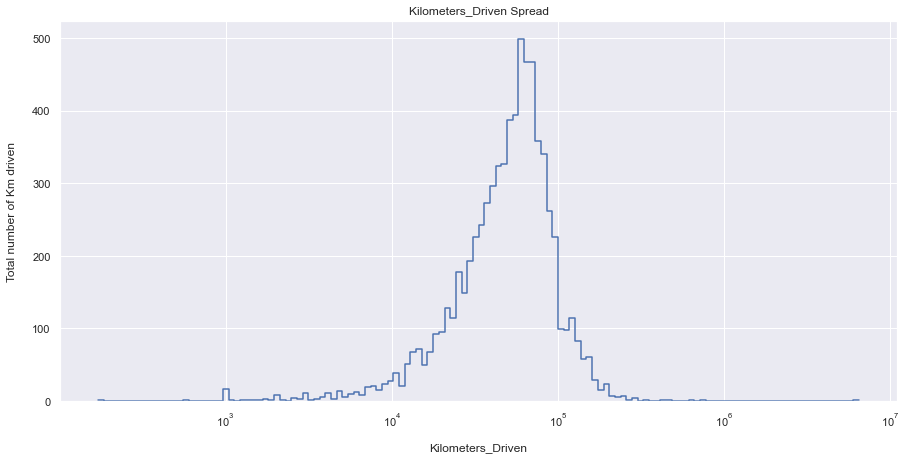

In [34]:
plt.figure(figsize=(15,7)) #set graph size
sns.histplot(data=new, x="Kilometers_Driven", log_scale=True, element="step", fill=False) #draw histplot with 'kilometers_driven' in a log scale, with transparent look.
plt.title('Kilometers_Driven Spread'); #set title name
plt.xlabel('Kilometers_Driven',labelpad=15); #x-axis's label 
plt.ylabel('Total number of Km driven', labelpad=15); #y-axis's label

- The graph seems like it distributed evenly because the it's a centered bell,but it is center-focused graph 
- The majority of used cars were driven mostly in between 100k to 1000k 

##### 2. Engine

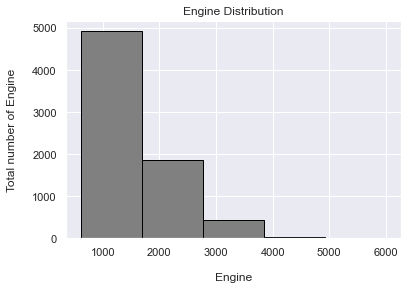

In [35]:
#engine
plt.hist(new['Engine'], bins=5, color='gray', edgecolor= 'black'); #draw histplot with 'engine'
plt.title("Engine Distribution"); #set title name
plt.xlabel('Engine',labelpad=15); #label x-axis
plt.ylabel('Total number of Engine', labelpad=15); #label y-axis

- The graph is right skewed 
- The highest range of used car's engine is around 1000CC. 

##### 3. Power

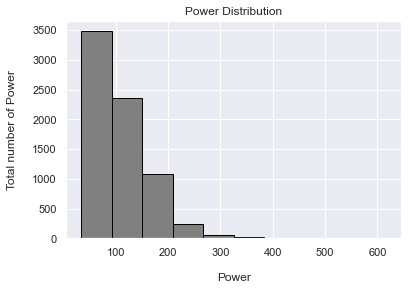

In [36]:
#Power
plt.hist(new['Power'], bins=10, color='gray', edgecolor= 'black'); #draw histplot with 'Power'
plt.title("Power Distribution");#set title name
plt.xlabel('Power',labelpad=15);#label x-axis
plt.ylabel('Total number of Power', labelpad=15); #label y-axis

- The graph is right skewed
- The highest range of power is in between 50~100 pbh. Most of used car has low horsepower

##### 4. Price

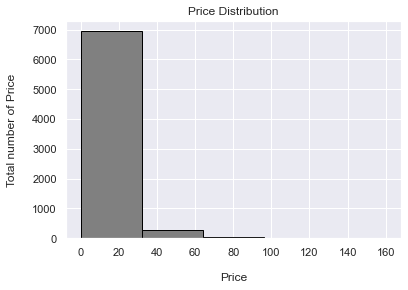

In [37]:
#Price 
plt.hist(new['Price'], bins=5, color='gray', edgecolor= 'black'); #draw histplot with 'Price'
plt.title("Price Distribution");#set title name
plt.xlabel('Price',labelpad=15); #label x-axis
plt.ylabel('Total number of Price', labelpad=15); #label y-axis

- The graph is right skewed 
- Most of used car's price range is from 1~30 Lakhs. Most of used cars were sold in silmilar price range 

##### 5. Name

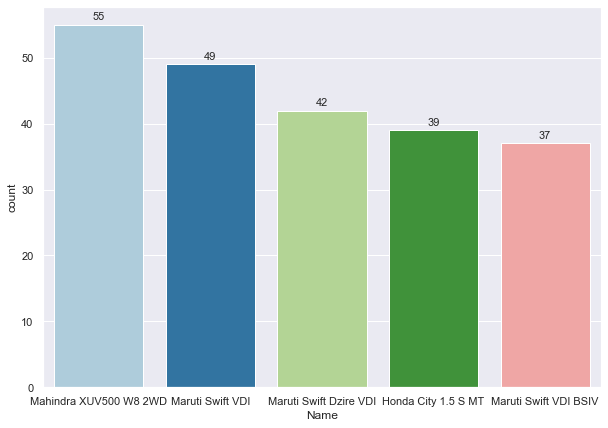

In [38]:
# top model sold
countplot, x= plt.subplots(figsize = (10,7))
x=sns.countplot(data=new, x='Name', palette="Paired", #draw countplot with only top 5 variables in 'Name'
              order=new.Name.value_counts().iloc[:5].index)
for num in x.patches:
    x.text (num.get_x() + num.get_width()  / 2,num.get_height()+ 0.75,num.get_height(),
            horizontalalignment='center', fontsize = 11)
plt.show()

- The total number of used car model that's on the market is Mahindra XUV500 W8

##### 6. Year

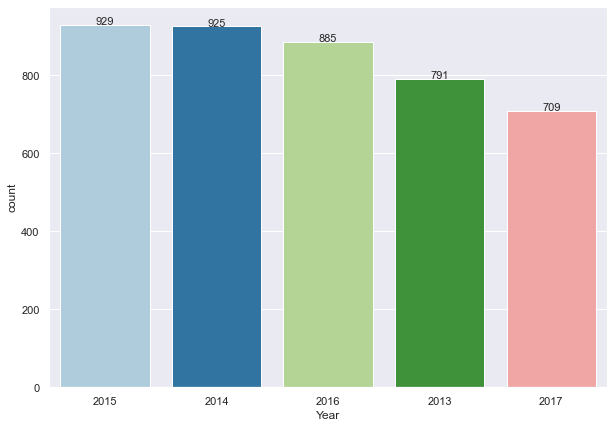

In [39]:
# most yr of car sold
countplot, x= plt.subplots(figsize = (10,7))
x=sns.countplot(data=new, x='Year', palette="Paired", #draw countplot with only top 5 variables in 'Year' 
                order=new.Year.value_counts().iloc[:5].index)

for num in x.patches:
    x.text (num.get_x() + num.get_width()  / 2,num.get_height()+ 0.75,num.get_height(), #show the each count of x-variables
            horizontalalignment='center', fontsize = 11) 
plt.show()

- The used car models are mostly manufactured in 2015 
- The range of top 5's manufactured yr is between 2013~2017. Most of used cars were made pretty recently 

##### 7. Transmission

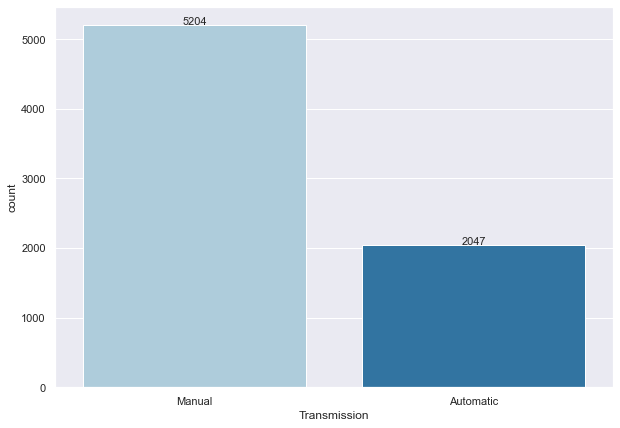

In [40]:
# transmission
countplot, x= plt.subplots(figsize = (10,7))
x=sns.countplot(data=new, x='Transmission', palette="Paired") #draw countplot with 'Transmission'

for num in x.patches:
    x.text (num.get_x() + num.get_width()  / 2,num.get_height()+ 0.75,num.get_height(),
            horizontalalignment='center', fontsize = 11)
plt.show()

- Most of used cars have manual transmission 

##### 8. Location

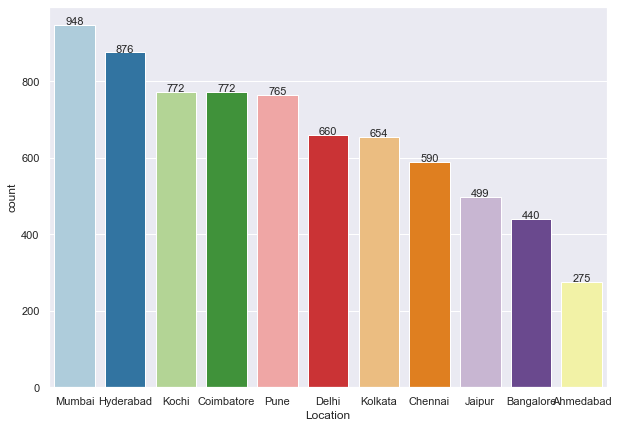

In [41]:
#Location
countplot, x= plt.subplots(figsize = (10,7))
x=sns.countplot(data=new, x='Location', palette="Paired", order = new['Location'].value_counts().index)

for num in x.patches:
    x.text (num.get_x() + num.get_width()  / 2,num.get_height()+ 0.75,num.get_height(),
            horizontalalignment='center', fontsize = 11)
plt.show()

- Most of cars are sold in Mumbai and Hyderabad
- Least of cars are sold in Ahmedabad

##### 9. Seats

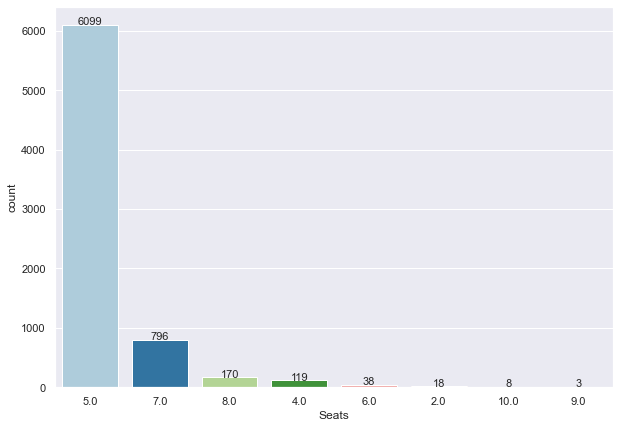

In [42]:
#seats
countplot, x= plt.subplots(figsize = (10,7))
x=sns.countplot(data=new, x='Seats', palette="Paired", order = new['Seats'].value_counts().index) #draw countplot with 'Seats' 

for num in x.patches:
    x.text (num.get_x() + num.get_width()  / 2,num.get_height()+ 0.75,num.get_height(),
            horizontalalignment='center', fontsize = 11)
plt.show()

- Most of used cars have 5 seats
- There are few used cars that has more than 8 seats. There are few people who buys large suv or van  

##### 10. Fuel Type

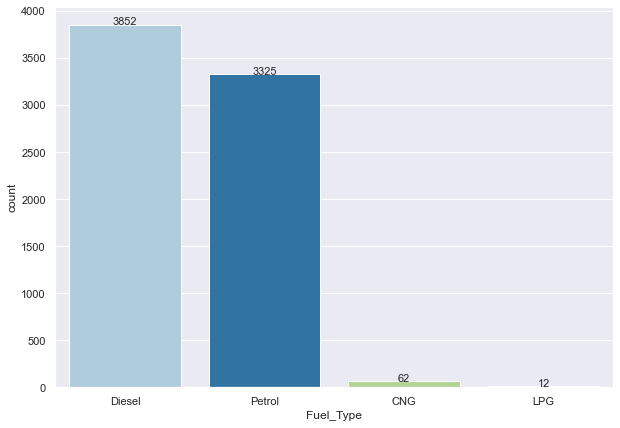

In [43]:
#fuel type
countplot, x= plt.subplots(figsize = (10,7))
x=sns.countplot(data=new, x='Fuel_Type', palette="Paired", order = new['Fuel_Type'].value_counts().index) #draw countplot with 'Fuel_Type'

for num in x.patches:
    x.text (num.get_x() + num.get_width()  / 2,num.get_height()+ 0.75,num.get_height(),
            horizontalalignment='center', fontsize = 11)
plt.show()

- Most of used cars' fuel type is diesel
- There a high number of petrol fuel type
- The least is LPG

##### 11. Owner_Type

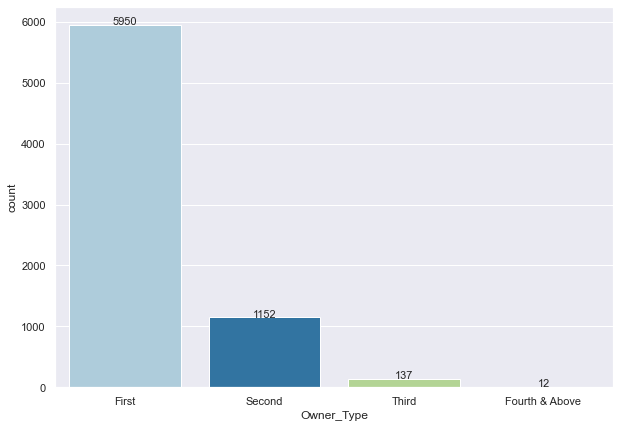

In [44]:
#Owner_Type
countplot, x= plt.subplots(figsize = (10,7))
x=sns.countplot(data=new, x='Owner_Type', palette="Paired", order = new['Owner_Type'].value_counts().index) #draw countplot with 'Owner_type'

for num in x.patches:
    x.text (num.get_x() + num.get_width()  / 2,num.get_height()+ 0.75,num.get_height(),
            horizontalalignment='center', fontsize = 11)
plt.show()

- Most of used cars had at least one owner before 

### Bivariate Analysis

### Correlation 

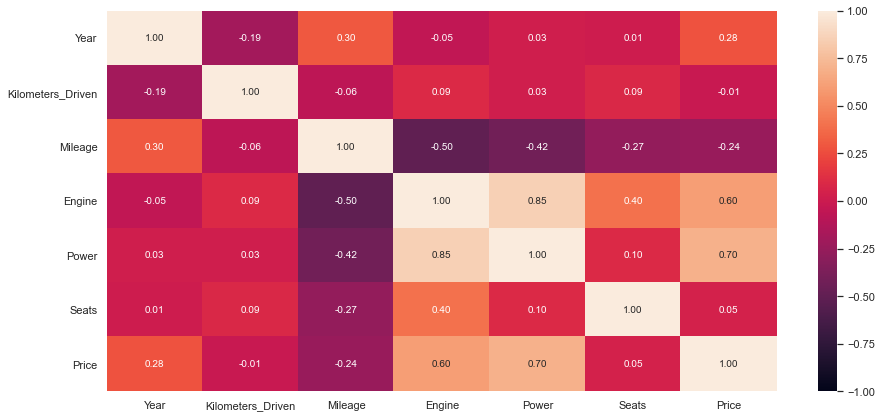

In [45]:
plt.figure(figsize=(15, 7))
sns.heatmap(new.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f") #draw heatmap that shows corr
plt.show()

- There is the highest correlation between 'Engine' and 'Power'
- Also there's high relationships bewteen 'Price'vs'Power' and 'Price'vs'Engine'
- Most of correlations are close to '0' and there are few negative correlations mostly related with 'Mileage'

Q1: what is the most bought yrs, location by model name 

In [ ]:
sns.catplot(data=new, x='Mileage', y='Price', col='Fuel_Type', hue='Year', kind='strip');

In [ ]:
x =sns.catplot(x='Year', y='Price', data=new,
                estimator=sum, col='Location', kind="point",
                height=3,col_wrap = 5)
x.set_xticklabels(rotation=90)
plt.show()

Q3:if km_driven value is high, used car price is sold cheaper 

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='Year', y='Price', data=new, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

In [31]:
#correlation

In [ ]:
sns.pairplot(data=new, hue="Transmission", diag_kind="kde")
plt.show()

#price vs power (positive corr)
plt.figure(figsize=(15, 7))
sns.histplot(new, x="Power", y="Price",
    bins=5, discrete=(True, False), log_scale=(False, True),
    cbar=True);

### Model building

##### Define dependent and independent variables

In [32]:
X = new.drop(["Price"], axis=1)
y = new["Price"]

##### Create dummies

In [33]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), #create dummies including object and category variables in one-hot coding
    drop_first=True,
)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,Name_Audi A3 35 TDI Premium Plus,Name_Audi A3 35 TDI Technology,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,0.044422,998.0,58.16,5.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,41000,8.359750,1582.0,126.20,5.0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,46000,7.735000,1199.0,88.70,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,8.827250,1248.0,88.76,7.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,40670,6.460000,1968.0,140.80,5.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
X.shape

(7251, 2061)

There are 7251 rows and 2061 columns

##### Split data into train and test data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [36]:
print(x_train.shape[0])
print(x_test.shape[0])

5075
2176


There are 5075 rows in train data

There are 2176 rows in test data

##### Fitting linear regression model

In [37]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

##### Check coefficients and intercepts

In [38]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,7.702832e-01
Kilometers_Driven,-9.838262e-06
Mileage,-1.496096e-01
Engine,3.191610e-03
Power,5.263045e-02
...,...
Transmission_Manual,-5.334624e+07
Owner_Type_Fourth & Above,6.171762e-01
Owner_Type_Second,-2.613286e-01
Owner_Type_Third,-1.608301e-01


### Coefficient Interpretations

* Coefficients of *Year*, *Engine*, *Power*, etc. are positive.
    - Increase in these will lead to an increase in the price of an used car.


* Coefficients of *Kilometers_Driven*, *Mileage*, *Transmission_Manual*, etc. columns are negative.
    - Increase in these will lead to a decrease in the price of an used car.

### Model performance evaluation

In [39]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

##### - Training Performance

In [40]:
# Checking model performance on train set
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.453979,1.552273,0.884054,0.804743,23.610849


##### - Test Performance

In [41]:
# Checking model performance on test set
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.126653e+07,8.273102e+06,-3.318898e+13,-6.332108e+14,1.068595e+08


- The train $R^2$ is 0.804 which indicates that the model explains 80% of the total variation in the train set.

- The test $R^2$ shows negative(-6.332) which can be interpreted as either a) the initial model was poorly designed, b) there are too many predictors c) no predictive values 

- RMSE values on the train and test sets are also not comparable. There's a huge gap between train and test's RMSE

- This shows that the model is overfitting.

- MAE indicates that our current model is able to predict prices within a mean error of 8.273

- MAPE of 1.068 on the test data means that we are able to predict within 10.7% of the used car price.

The overall, test set needs adjustments for comparible performance between train and test 

### Feature Selection

##### Build SFS and perfrom SFS

In [ ]:
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=0,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

##### Perform SFS feature

In [2]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

NameError: name 'sfs' is not defined

##### Build SFF selection

In [ ]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=30,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

In [ ]:
#select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

In [ ]:
# print the names of the important features
x_train.columns[feat_cols]

In [ ]:
x_train_final = x_train[x_train.columns[feat_cols]]

##### Create new x_test variable from x_train

In [ ]:
# Creating new x_test with the same variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

##### - Train set performance

In [ ]:
# model performance on train set
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

##### - Test set performance

In [ ]:
# model performance on test set
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

##### Compare training performances

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T], #concate previous train model and new model 
    axis=1,
)

models_train_comp_df.columns = [ #comepare two org LR and SFS features
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

##### Compare testing performances

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T], #concate previous train model and new model
    axis=1,
)

models_test_comp_df.columns = [  #comepare two org LR and SFS features
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

### Conclusion

- Build a predictive model that can be used by used car buyers to predict the market price of used car models with an R2 of 0.80 on the training set
- Found out that the  are some of the factors which tend to increase the price of the used car
- As the value of Mileage and Kilometer_driven goes higher, the price of used car tends to decrease. They are some of the factors which tend to decrease the market price of used cars
- We can also explore improving the linear model by applying non-linear transformations to some of the attributes. This might help us better identify the patterns in the data to predict the price of used car more accurately